### Steps
#### 1- Import necessary libraries
#### 2- Read the dataset using Pandas
#### 3- Explore the dataset properties
#### 4- Visualize the relationship between different variables and draw insights

In [1]:
#To read the dataset
import pandas as pd 

#For visualization
import matplotlib.pyplot as plt

In [18]:
#Read the dataset

df = pd.read_csv("C:\\Users\\Ezra\\Documents\\Python Practice\\Python-Projects-Uber-Trips-Analysis\\Data\\uber-raw-data-sep14.csv")

#Display the first 5 records

df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [19]:
#Display the last 5 records

df.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [20]:
#Find the shape of the dataset

df.shape

(1028136, 4)

In [5]:
#Understand the dataset properties

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


#### Let's break the Date/Time column to "Day", "Hour", & "Weekday".

In [22]:
#Change the "Date/Time" column's data type from string to datetime

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

#Convert "Date/Time" column from string data type into DateTime

df['Day'] = df['Date/Time'].apply(lambda x: x.day)
df['Hour'] = df['Date/Time'].apply(lambda x: x.hour)
df['Weekday'] = df['Date/Time'].apply(lambda x: x.weekday())

cols = list(df.columns.values)

df = df[cols[0:1] + cols[4:7] + cols[1:4]]
df.head()

,Date/Time,Day,Hour,Weekday,Lat,Lon,Base
0,2014-09-01 00:01:00,1,0,0,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,1,0,0,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,1,0,0,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,1,0,0,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,1,0,0,40.8145,-73.9444,B02512


#### Now we can check the density of rides according to days, hours, and weekdays

Text(0, 0.5, 'Density of rides')

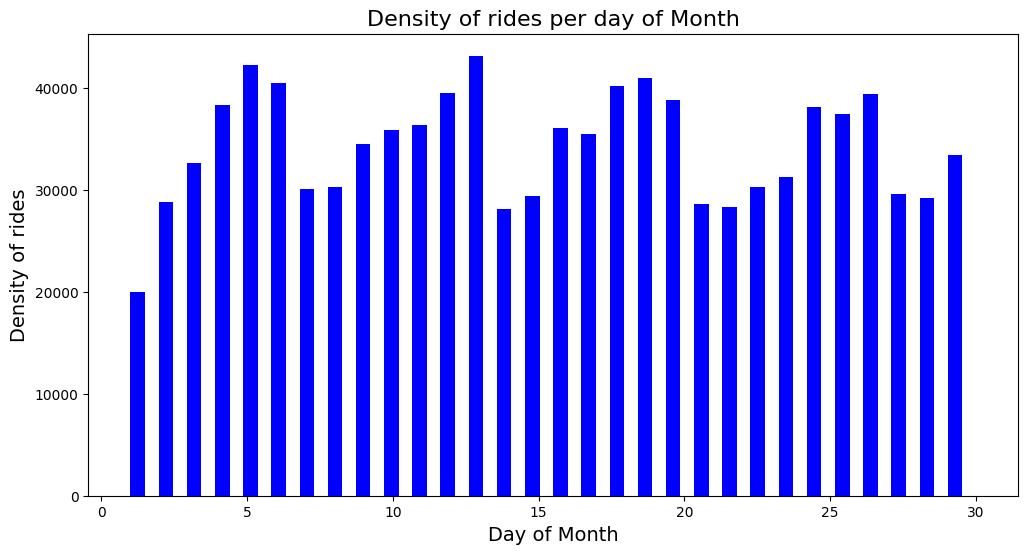

In [33]:
#Visualize the Density of rides per Day of month

fig,ax = plt.subplots(figsize=(12,6))
plt.hist(df['Day'], width=.5, bins=30, color= "b")
plt.title('Density of rides per day of Month', fontsize=16)
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('Density of rides', fontsize=14)

#### From the above plot we can notice that the highest number of rides are during working days (Monday to Friday), while the least number of rides are in weekends.

Text(0, 0.5, 'Density of rides')

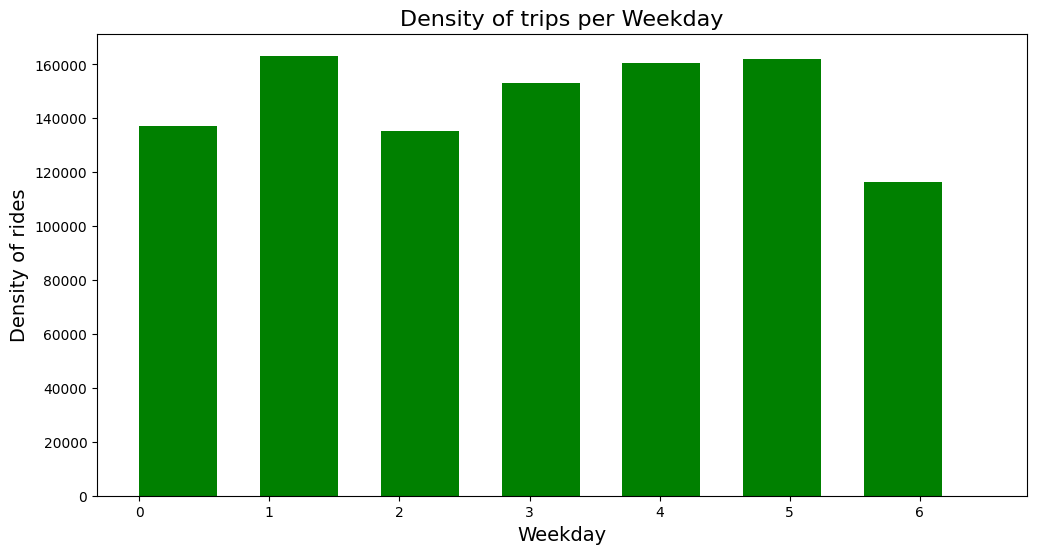

In [42]:
#Visualize the Density of rides per Weekday
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(df['Weekday'], width= 0.6, bins=7, range=(0, 6.5), color= 'green')
plt.title('Density of trips per Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Density of rides', fontsize=14)

#### The busiest day in the week for Uber is Tuesday. On the other hand, Sunday is the day with the least number of rides.

Text(0, 0.5, 'Density of rides')

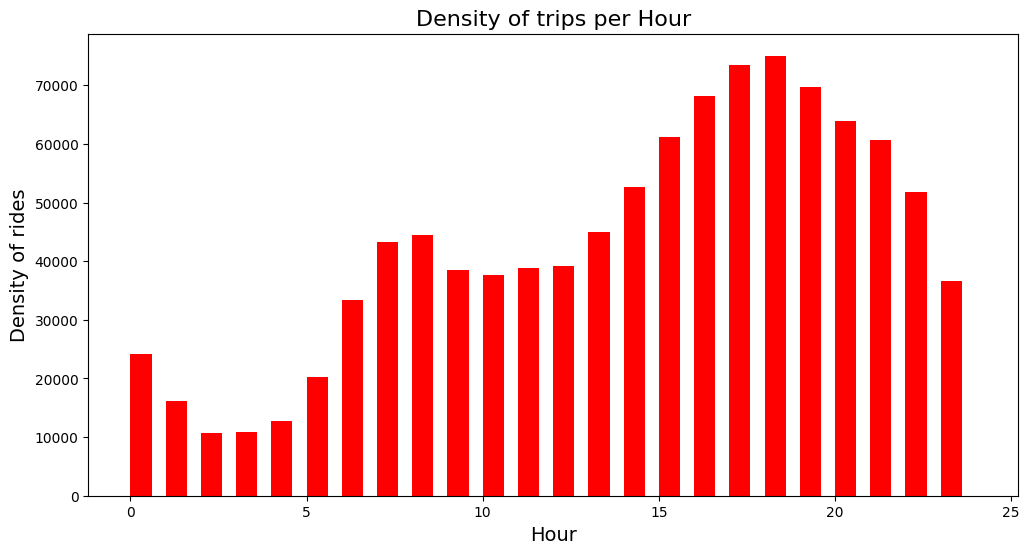

In [46]:
#Visualize the Density of rides per hour
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(df['Hour'], width= 0.6, bins=24, range=(0, 24), color= 'r')
plt.title('Density of trips per Hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Density of rides', fontsize=14)

#### The number of rides decrease from 12 AM to 2 AM and then increases starting from 3 AM onward till it reaches 6 PM which is the hour with the highest number of rides. From 6 PM onwards, the number of rides decrease.

Text(0, 0.5, 'Latitude')

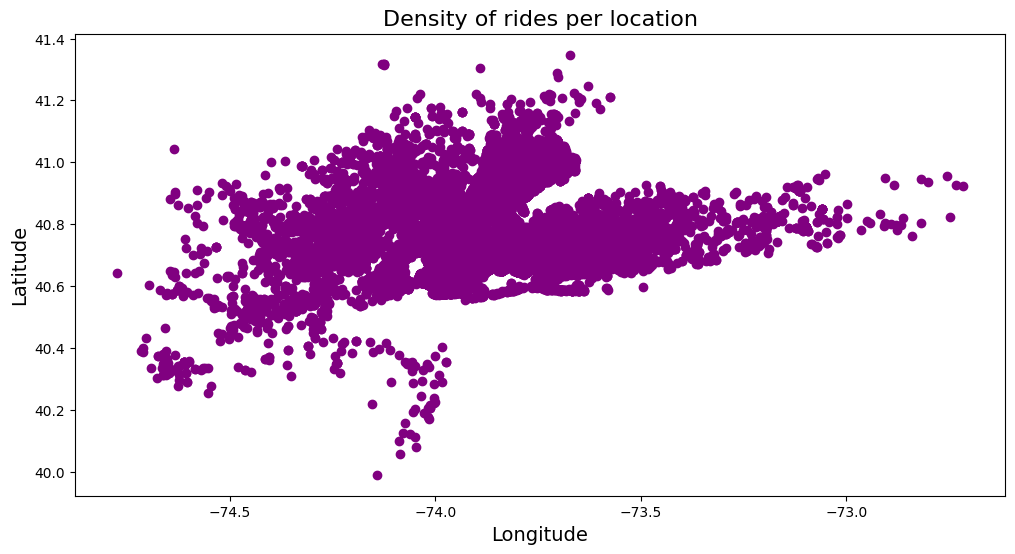

In [55]:
#Visualize the Density of rides per location

fig,ax = plt.subplots(figsize = (12,6))
x= df.Lon
y= df.Lat
plt.scatter(x, y, color= "purple")
plt.title("Density of rides per location", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

#### The region with the highest density of rides is near Manhattan and Newburgh. While the region with the lowest density is near New Jersey.
